In [5]:
import datetime as datetime
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

data = pd.read_csv('../train.csv', encoding='utf-8')

[nltk_data] Downloading package stopwords to /home/martin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#Agrego la columna longitud al dataframe
data['length'] = data['text'].str.len()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
length      7613 non-null int64
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [24]:
#Delete hyperlinks from text. After deleting clear data from symbols except english alphabet
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and training datasets
data['text'] = data['text'].apply(lambda x: clean_text(x))

In [25]:
#Delete stopwords
stopwordsset = set(stopwords.words('english'))
stopwordsset.update(['im', 'like', 'get'])
data['text'] = data['text'].map(lambda x: ' '.join([word for word in x.split(' ') if word not in stopwordsset])) 

In [26]:
# if after deleting empty unsignificant words text become empty replace it with empty placeholder
data.loc[data.text=='',"text"] = "emptyplaceholder"

In [27]:
data['keyword'] = data.keyword.str.replace('%20', ' ')

In [28]:
data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,69
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38
2,5,NaN,NaN,residents asked shelter place notified officer...,1,133
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1,65
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88


In [29]:
#Delete words encountered less than twice
allwords = []
text_as_list = list(data['text'].map(lambda x: x.split(' ')))
[[allwords.append(word) for word in tweet] for tweet in text_as_list]
allwords = list(filter(lambda a: a != '', allwords))

In [30]:
words_frequency = pd.Series(allwords,name="words").value_counts()
words_frequency

amp           298
fire          248
new           223
via           220
people        196
             ... 
erker           1
niiiice         1
stonewall       1
rediscover      1
roimentor       1
Name: words, Length: 16698, dtype: int64

In [31]:
disastersData = data.loc[data['target'] == 1, :]

In [32]:
#Delete words encountered less than twice
disastersWords = []
disasters_text_as_list = list(disastersData['text'].map(lambda x: x.split(' ')))
[[disastersWords.append(word) for word in tweet] for tweet in disasters_text_as_list]
disastersWords = list(filter(lambda a: a != '', disastersWords))

In [33]:
disasters_words_frequency = pd.Series(disastersWords,name="words").value_counts()
disasters_words_frequency

fire          177
news          132
via           121
disaster      116
california    111
             ... 
fema            1
happiness       1
crashgt         1
duo             1
roimentor       1
Name: words, Length: 8723, dtype: int64

In [34]:
notDisastersData = data.loc[data['target'] == 0, :]

In [35]:
#Delete words encountered less than twice
notDisastersWords = []
not_disasters_text_as_list = list(notDisastersData['text'].map(lambda x: x.split(' ')))
[[notDisastersWords.append(word) for word in tweet] for tweet in not_disasters_text_as_list]
notDisastersWords = list(filter(lambda a: a != '', notDisastersWords))

In [36]:
not_disasters_words_frequency = pd.Series(notDisastersWords,name="words").value_counts()
not_disasters_words_frequency

amp             192
new             168
dont            139
one             126
body            112
               ... 
dock              1
heroine           1
experienced       1
terms             1
gassymexican      1
Name: words, Length: 11777, dtype: int64

In [37]:
first_10_keywords = data['keyword'].value_counts().head(10).index.to_list()

In [38]:
data['keyword'].value_counts().head(10)

fatalities    45
deluge        42
armageddon    42
sinking       41
harm          41
body bags     41
damage        41
outbreak      40
evacuate      40
siren         40
Name: keyword, dtype: int64

In [39]:
data.loc[data['keyword'].isin(first_10_keywords),:].groupby('keyword')['target'].agg({'Promedio desastre real':'mean'}).reset_index()

/home/martin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,keyword,Promedio desastre real
0,armageddon,0.119048
1,body bags,0.024390
2,damage,0.463415
3,deluge,0.142857
4,evacuate,0.625000
5,fatalities,0.577778
6,harm,0.097561
7,outbreak,0.975000
8,sinking,0.195122
9,siren,0.125000


In [75]:
group_by_keyword = data.groupby('keyword')['target'].agg({'Cantidad' : 'count', 'Porcentaje veracidad' : 'mean'})
group_by_keyword

/home/martin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,Cantidad,Porcentaje veracidad
keyword,,
ablaze,36,0.361111
accident,35,0.685714
aftershock,34,0.000000
airplane accident,35,0.857143
ambulance,38,0.526316
...,...,...
wounded,37,0.702703
wounds,33,0.303030
wreck,37,0.189189


In [76]:
group_by_keyword['Porcentaje veracidad'] = group_by_keyword['Porcentaje veracidad'].multiply(other = 100).round(decimals=1)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

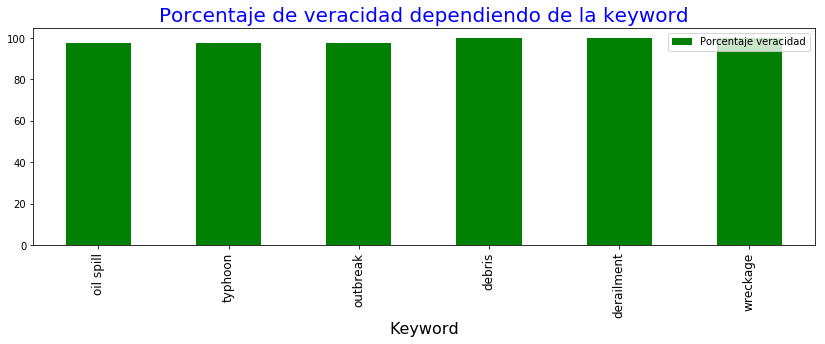

In [92]:
group_by_keyword.loc[(group_by_keyword['Cantidad'] > 35) & (group_by_keyword['Porcentaje veracidad'] > 90), ['Porcentaje veracidad']].sort_values(by=['Porcentaje veracidad']).plot(kind='bar',figsize=(14,4), color='green')
plt.title('Porcentaje de veracidad dependiendo de la keyword' , fontsize = 20, color = 'blue')  
plt.xlabel('Keyword', fontsize = 16);
plt.xticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

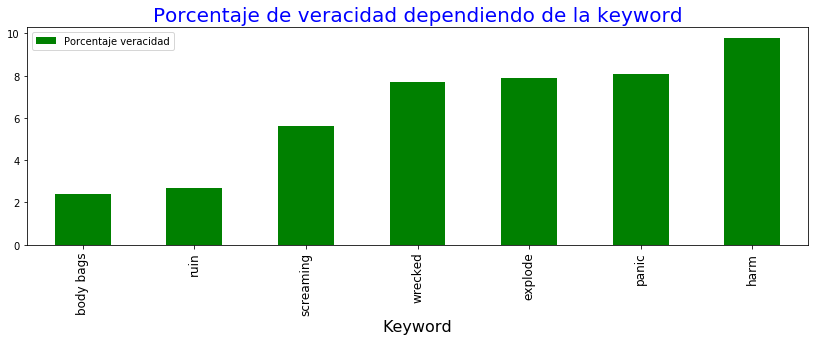

In [89]:
group_by_keyword.loc[(group_by_keyword['Cantidad'] > 35) & (group_by_keyword['Porcentaje veracidad'] < 10), ['Porcentaje veracidad']].sort_values(by=['Porcentaje veracidad']).plot(kind='bar',figsize=(14,4), color='green')
plt.title('Porcentaje de veracidad dependiendo de la keyword' , fontsize = 20, color = 'blue')  
plt.xlabel('Keyword', fontsize = 16);
plt.xticks(fontsize=12)